In [2]:
# Import fundamental libraries
# import sys
import os

# Import datasci libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from PIL import Image
import datetime as dt

# Configure fonts
FONT_PATH = "/workspaces/Enterprise/00_Pinksheepkit/fonts/poppins/Poppins-{0}.ttf"
# FONT_PATH = "c://Users//Art//Documents//A1-AspirePC//CS Project//07_Enterprise//Enterprise//00_Pinksheepkit//fonts//poppins//Poppins-{0}.ttf"
HEADING = "Bold"
LABEL = "Regular"
CONTENT = "Light"

H_FONT = {"fontproperties": fm.FontProperties(fname=FONT_PATH.format(HEADING)), "size": 12}
L_FONT = {"fontproperties": fm.FontProperties(fname=FONT_PATH.format(LABEL)), "size": 10}
C_FONT = {"fontproperties": fm.FontProperties(fname=FONT_PATH.format(CONTENT)), "size": 8}

# Configure plt rc params
plt.rcParams['figure.dpi'] = 100

# Configure system path
# sys.path = [
#     '/workspaces/Enterprise/02_Candlestick', # Working dir
#     '/home/codespace/.python/current/lib/python310.zip',
#     '/home/codespace/.python/current/lib/python3.10',
#     '/home/codespace/.python/current/lib/python3.10/lib-dynload',
#     '/home/codespace/.local/lib/python3.10/site-packages',
#     '/home/codespace/.python/current/lib/python3.10/site-packages']


In [3]:
# Get file path
# PATH_INPUT = "c://Users//Art//Documents//A1-AspirePC//CS Project//07_Enterprise//Enterprise//02_Candlestick//input//"
PATH_INPUT = "/workspaces/Enterprise/02_Candlestick/input/"
FILE_INPUT = next(os.walk(PATH_INPUT), (None, None, []))[2]

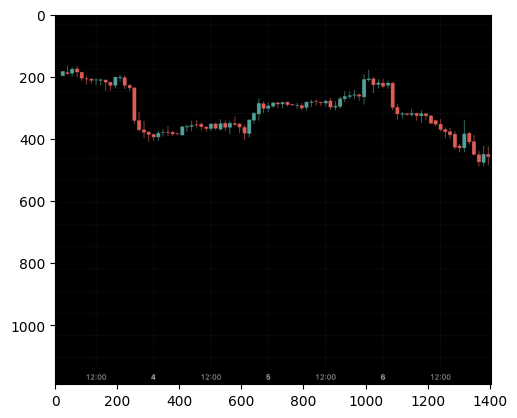

In [4]:
# load the image and convert into list
IMG = Image.open(PATH_INPUT + FILE_INPUT[0])
IMG_LIST = np.asarray(IMG).tolist()

# Loop over pixels and collect frequency of each color pixel
COLOR_FREQ = {(0, 0, 0): 0}
for h in np.arange(len(IMG_LIST)):
    for w in np.arange(len(IMG_LIST[h])):
        r, g, b = IMG_LIST[h][w]
        if (r, g, b) in COLOR_FREQ:
            COLOR_FREQ[(r, g, b)] += 1
        else:
            COLOR_FREQ[(r, g, b)] = 1

# Sort COLOR_FREQ keys by values
COLOR_FREQ = ({k: v for k, v in sorted(COLOR_FREQ.items(), key=lambda item: item[1])})

# Check processed image
plt.imshow(IMG_LIST)


In [5]:
# Plot color composition
def color_composition(color_freq):
    """Scatter plot of all pixel R/G color composition"""

    # Prepare varibles for R-G plot
    var_label = list(color_freq.keys())
    var_freq = list(color_freq.values())
    var_r = [r for r, g, b in var_label]
    var_g = [g for r, g, b in var_label]
    var_colors = [((r / 255), (g / 255), (b / 255)) for r, g, b in var_label]
    var_size = [100 * s/(100 + s) for s in var_freq]
    
    # Prepare varibles for (R+G)-(R/G) plot
    var_plus = [r + g for r, g, b in var_label]
    var_diff = [r - g for r, g, b in var_label]

    # Plot bar charts
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].scatter(var_r, var_g, c=var_colors, s=var_size)
    ax[1].scatter(var_diff, var_plus, c=var_colors, s=var_size)
    
    # # Format charts
    plt.xticks(**C_FONT)
    plt.yticks(**C_FONT)
    ax[0].set_title("Image color composition R/G", **H_FONT)
    ax[0].set_xlabel("Red HEX", **L_FONT)
    ax[0].set_ylabel("Green HEX", **L_FONT)
    ax[0].grid(True)
    ax[1].set_title("Image color composition RG-Brightness", **H_FONT)
    ax[1].set_xlabel("R - G", **L_FONT)
    ax[1].set_ylabel("R + G", **L_FONT)
    ax[1].grid(True)

    return(fig, ax)


(<Figure size 1000x500 with 2 Axes>,
 array([<Axes: title={'center': 'Image color composition R/G'}, xlabel='Red HEX', ylabel='Green HEX'>,
        <Axes: title={'center': 'Image color composition RG-Brightness'}, xlabel='R - G', ylabel='R + G'>],
       dtype=object))

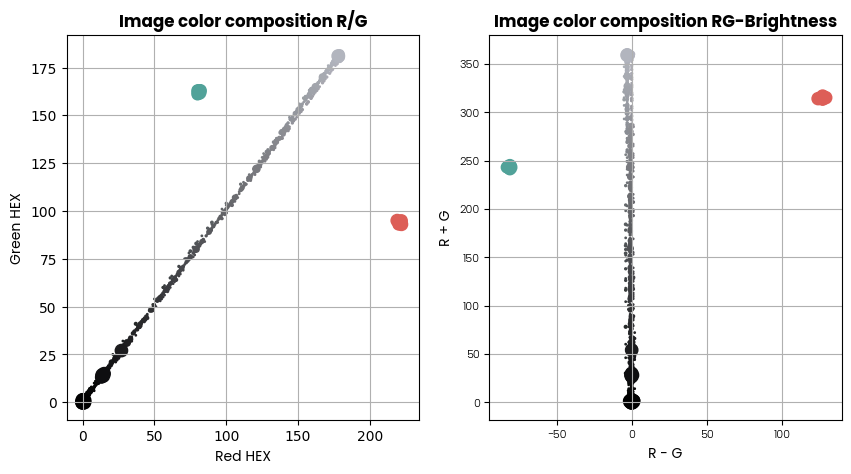

In [6]:
# Analyze color composition
color_composition(COLOR_FREQ)

# Bullish candle -> (70-120, 150-170, 140-160) -> (81, 162, 153)
# Bearish candle -> (180-230, 80-100, 80-100) -> (221, 94, 87)

In [7]:
# Highlight bull and bear candles
# Bull -> R - G < -10 & R + G > 200
# Bear -> R + G > 10 & R + G > 200
# Loop over pixels
CANDLESTICK_POLYMERASE = {} # {w: [count, lowest_point]}
for h in np.arange(len(IMG_LIST)):
    for w in np.arange(len(IMG_LIST[h])):
        r, g, b = IMG_LIST[h][w]
        if (r + g > 200) & (r - g < -10):
            if w in CANDLESTICK_POLYMERASE:
                CANDLESTICK_POLYMERASE[w][0] += 1
                CANDLESTICK_POLYMERASE[w][1] = len(IMG_LIST[h]) - h - 1
            else:
                CANDLESTICK_POLYMERASE[w] = [1, len(IMG_LIST[h]) - h - 1]
        elif (r + g > 200) & (r - g > 10):
            if w in CANDLESTICK_POLYMERASE:
                CANDLESTICK_POLYMERASE[w][0] -= 1
                CANDLESTICK_POLYMERASE[w][1] = len(IMG_LIST[h]) - h - 1
            else:
                CANDLESTICK_POLYMERASE[w] = [-1, len(IMG_LIST[h]) - h - 1]
        else:
            if w not in CANDLESTICK_POLYMERASE:
                CANDLESTICK_POLYMERASE[w] = [0, 0]

# Sort CANDLESTICK_POLYMERASE keys
CANDLESTICK_POLYMERASE = ({k: v for k, v in sorted(
    CANDLESTICK_POLYMERASE.items(), key=lambda item: item[0])})


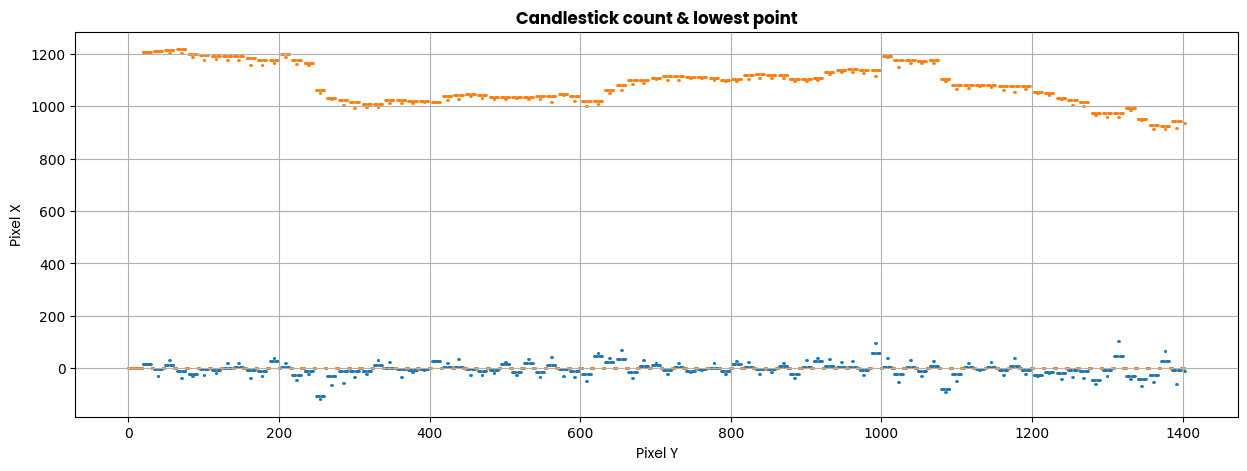

In [8]:
# Visualize candlestick reading
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(list(CANDLESTICK_POLYMERASE.keys()), list(i[0] for i in CANDLESTICK_POLYMERASE.values()), s=1, label="count")
ax.scatter(list(CANDLESTICK_POLYMERASE.keys()), list(
    i[1] for i in CANDLESTICK_POLYMERASE.values()), s=1, label="lowest")

ax.set_title("Candlestick count & lowest point", **H_FONT)
ax.set_xlabel("Pixel Y", **L_FONT)
ax.set_ylabel("Pixel X", **L_FONT)
ax.grid(True)


In [9]:
# Generate candlestick value
CANDLESTICK = {} # {date: [open, high, low, close]}

# Manage datetime
# datetime(year, month, day, hour, minute, second)
initial_time = dt.datetime(2022, 12, 28, 00, 00, 00)
delta_time = dt.timedelta(hours=1)

def next_datetime(time, dt=delta_time):
    """Forward candlestick time"""
    while True:
        time += dt
        # XAU market close -> SAT 05.00 - MON 04.00
        if (time.weekday() in [1, 2, 3, 4]) | ((time.weekday() == 5) & (time.hour < 5)) | ((time.weekday() == 0) & (time.hour > 4)):
            break
    return time

candle_time = initial_time
position = 0

while position < len(CANDLESTICK_POLYMERASE):
    # Find candle (count != 0) 
    if CANDLESTICK_POLYMERASE[position][0] > 0: # Bullish candle
        CANDLESTICK[candle_time] = {"open": CANDLESTICK_POLYMERASE[position][1], 
                                    "high": CANDLESTICK_POLYMERASE[position][0] + CANDLESTICK_POLYMERASE[position][1], 
                                    "low": CANDLESTICK_POLYMERASE[position][1], 
                                    "close": CANDLESTICK_POLYMERASE[position][0] + CANDLESTICK_POLYMERASE[position][1],
                                    "type": "bullish"}
        position += 1
        while position < len(CANDLESTICK_POLYMERASE):
            if CANDLESTICK_POLYMERASE[position][0] == 0:
                break
            CANDLESTICK[candle_time]["high"] = CANDLESTICK_POLYMERASE[position][0] + CANDLESTICK_POLYMERASE[position][1]
            CANDLESTICK[candle_time]["low"] = CANDLESTICK_POLYMERASE[position][1]
            position += 1
        candle_time = next_datetime(candle_time)
    elif CANDLESTICK_POLYMERASE[position][0] < 0: # Bearish candle
        CANDLESTICK[candle_time] = {"open": CANDLESTICK_POLYMERASE[position][0] + CANDLESTICK_POLYMERASE[position][1], 
                                    "high": CANDLESTICK_POLYMERASE[position][1], 
                                    "low": CANDLESTICK_POLYMERASE[position][0] + CANDLESTICK_POLYMERASE[position][1], 
                                    "close": CANDLESTICK_POLYMERASE[position][1],
                                    "type": "bearish"}
        position += 1
        while position < len(CANDLESTICK_POLYMERASE):
            if CANDLESTICK_POLYMERASE[position][0] == 0:
                break
            CANDLESTICK[candle_time]["high"] = CANDLESTICK_POLYMERASE[position][0] + CANDLESTICK_POLYMERASE[position][1]
            CANDLESTICK[candle_time]["low"] = CANDLESTICK_POLYMERASE[position][1]
            position += 1
        candle_time = next_datetime(candle_time)
    position += 1

In [10]:
# Calibrate candlestick price
c_date = dt.datetime(2022, 12, 28, 00, 00, 00)
c_open = 0
c_high = 0
c_low = 0
c_close = 0

# Get non-calibrated price from candlestick
non_calibrated_value = CANDLESTICK[c_date]
candle_price_per_pixel = abs(non_calibrated_value["open"] - non_calibrated_value["close"]) / abs(c_open - c_close)
wick_price_per_pixel = abs(non_calibrated_value["high"] - non_calibrated_value["low"]) / abs(c_high - c_low)
price_per_pixel = (candle_price_per_pixel + wick_price_per_pixel) / 2

# y = mx + c
# c_open = price_per_pixel * nc_open + c

{datetime.datetime(2022, 12, 28, 0, 0): {'open': 1205,
  'high': 1220,
  'low': 1205,
  'close': 1220},
 datetime.datetime(2022, 12, 28, 1, 0): {'open': 1208,
  'high': 1208,
  'low': 1212,
  'close': 1212},
 datetime.datetime(2022, 12, 28, 2, 0): {'open': 1213,
  'high': 1227,
  'low': 1213,
  'close': 1227},
 datetime.datetime(2022, 12, 28, 3, 0): {'open': 1206,
  'high': 1206,
  'low': 1217,
  'close': 1217},
 datetime.datetime(2022, 12, 28, 4, 0): {'open': 1177,
  'high': 1177,
  'low': 1197,
  'close': 1197},
 datetime.datetime(2022, 12, 28, 5, 0): {'open': 1194,
  'high': 1194,
  'low': 1195,
  'close': 1195},
 datetime.datetime(2022, 12, 28, 6, 0): {'open': 1185,
  'high': 1185,
  'low': 1190,
  'close': 1190},
 datetime.datetime(2022, 12, 28, 7, 0): {'open': 1191,
  'high': 1193,
  'low': 1191,
  'close': 1193},
 datetime.datetime(2022, 12, 28, 8, 0): {'open': 1190,
  'high': 1193,
  'low': 1190,
  'close': 1193},
 datetime.datetime(2022, 12, 28, 9, 0): {'open': 1176,
  'high':